# Sezione 1 — Titolo e obiettivi della lezione

**Lezione 18 — Metriche di Regressione per Data Analyst**

Questa lezione guida un* data analyst nella lettura critica delle metriche di errore dei modelli di regressione, mantenendo il focus sull'impatto business. È pensata per chi ha già eseguito una regressione lineare semplice ed è in grado di manipolare `NumPy`, `pandas` e `scikit-learn`.

---

## Mappa della lezione

| Sezione | Contenuto | Tempo stimato |
|---------|-----------|---------------|
| 1 | Titolo, obiettivi, prerequisiti | 5 min |
| 2 | Teoria profonda: MAE, MSE, RMSE, MAPE, R², residui | 20 min |
| 3 | Schema mentale: flowchart scelta metrica | 5 min |
| 4 | Demo: calcolo metriche su micro-dataset | 15 min |
| 5 | Esercizi risolti + errori comuni | 25 min |
| 6 | Conclusione operativa con bignami | 10 min |
| 7 | Checklist di fine lezione + glossario | 5 min |
| 8 | Changelog didattico | 2 min |

---

## Obiettivi operativi

Al termine di questa lezione sarai in grado di:

| # | Obiettivo | Verifica |
|---|-----------|----------|
| 1 | Confrontare MAE, MSE/RMSE, MAPE, R² e R²_adj | Sai quale usare per outlier vs comunicazione? |
| 2 | Diagnosticare un modello tramite grafici dei residui | Riconosci eteroschedasticità e pattern a U? |
| 3 | Scegliere la metrica coerente con il contesto business | Sai perché il CFO preferisce MAPE? |
| 4 | Costruire un mini-report riproducibile | Puoi generare una tabella comparativa 3 modelli? |

---

## Formule fondamentali (reference card)

```
MAE  = (1/n) Σ|yᵢ - ŷᵢ|           → Errore medio, stesse unità di y
MSE  = (1/n) Σ(yᵢ - ŷᵢ)²          → Penalizza errori grandi, unità y²
RMSE = √MSE                        → Riporta alla scala originale

MAPE = (100/n) Σ|yᵢ - ŷᵢ|/|yᵢ|    → Errore %, richiede yᵢ ≠ 0

R²   = 1 - SS_res / SS_tot         → % varianza spiegata
     = 1 - Σ(yᵢ - ŷᵢ)² / Σ(yᵢ - ȳ)²

R²_adj = 1 - (1-R²) × (n-1)/(n-p-1)  → Penalizza feature inutili
```

**Relazione chiave:** RMSE ≥ MAE sempre (dimostrazione: per disuguaglianza di Cauchy-Schwarz)

---

## Quando usare cosa: tabella decisionale

| Situazione | Metrica preferita | Motivo |
|------------|-------------------|--------|
| Comunicazione con CFO/stakeholder | **MAPE** | "Sbagliamo del 5%" è immediato |
| Ottimizzazione tecnica | **RMSE** | Penalizza errori grandi |
| Dataset con outlier | **MAE** | Non esplode |
| Confronto modelli con feature diverse | **R²_adj** | Penalizza overfitting |
| Target può essere 0 o negativo | **MAE/RMSE** | MAPE non applicabile |
| Devi spiegare varianza | **R²** | Intuitivo: "il modello spiega il 80% della varianza" |

---

## Prerequisiti rapidi

| Concetto | Dove lo trovi | Verifica |
|----------|---------------|----------|
| LinearRegression | Lezione 6-7 | Sai usare `.fit()` e `.predict()`? |
| Train/Test Split | Lezione 10-11 | Conosci `random_state`? |
| NumPy/pandas base | Lezione 1-3 | Puoi calcolare `np.mean()` su un array? |

**Micro-checkpoint prerequisiti:**
```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
print("Prerequisiti OK!" if callable(mean_absolute_error) else "Rivedi import")
```

---

## Indice (struttura a 8 sezioni)

1. Titolo e obiettivi della lezione
2. Teoria profonda sulle metriche di regressione
3. Mental model e decision map
4. Dimostrazione guidata con micro-checkpoint
5. Esercizi risolti + errori comuni
6. Conclusione operativa con bignami
7. Checklist finale + glossario
8. Changelog didattico

> **Regole del notebook:** solo ASCII, niente emoji, esecuzione dall'alto verso il basso, gli stessi dati sintetici vengono riutilizzati nei vari esercizi, micro-checkpoint obbligatori.

---

## Sezione 2 — Teoria profonda sulle metriche di regressione

### 2.1 MAE, MSE, RMSE
- **MAE (Mean Absolute Error)** misura l'errore medio in unità della variabile target. Formula: $MAE = \frac{1}{n}\sum_{i=1}^n |y_i-\hat y_i|$. È robusto agli outlier perché ogni errore pesa linearmente.
- **MSE (Mean Squared Error)** eleva al quadrato lo scostamento: $MSE = \frac{1}{n}\sum_{i=1}^n (y_i-\hat y_i)^2$. Penalizza in modo aggressivo gli errori grandi ma introduce unità al quadrato.
- **RMSE (Root MSE)** riporta l'errore alla scala originale: $RMSE = \sqrt{MSE}$. È più leggibile del MSE ma mantiene la stessa sensibilità agli outlier.

### 2.2 MAPE e comunicazione con il business
- **MAPE (Mean Absolute Percentage Error)**: $MAPE = \frac{100}{n}\sum_{i=1}^n \left|\frac{y_i-\hat y_i}{y_i}\right|$. Offre un errore medio percentuale semplice da raccontare, ma richiede $y_i \neq 0$ e può esplodere quando il denominatore è vicino a zero.

### 2.3 $R^2$ e $R^2_{adj}$
- $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ misura quanta varianza del target è spiegata dal modello rispetto a una baseline costante.
- $R^2_{adj} = 1 - (1-R^2)\frac{n-1}{n-p-1}$ penalizza feature inutili (dove $p$ è il numero di feature e $n$ i campioni). Se aggiungo una feature non informativa, $R^2$ aumenta leggermente mentre $R^2_{adj}$ scende.

### 2.4 Residui e diagnostica
- Residuo $r_i = y_i - \hat y_i$: vogliamo media circa 0, varianza costante e nessun pattern rispetto ai predetti, al tempo o a una feature.
- Pattern a U o varianza crescente indicano rispettivamente mancanza di termini non lineari o eteroschedasticità.
- La normalità perfetta non è sempre necessaria, ma residui estremamente non normali segnalano possibili outlier o feature mancanti.

### 2.5 Scelta della metrica in funzione del contesto
| Scenario | Metrica preferita | Motivo |
|----------|-------------------|--------|
| Comunicazione con CFO | MAPE | Percentuale immediata |
| Ottimizzazione tecnica | RMSE | Penalizza errori ampi |
| Dataset con possibili outlier | MAE | Non esplode |
| Modelli con molte feature | $R^2_{adj}$ | Penalizza feature inutili |
| Monitoraggio residui | Grafici residui + MAE | Facile grading |

### 2.6 Micro-checkpoint teorici
1. **Scala delle metriche**: MAE/RMSE devono avere le stesse unità del target; se non succede, probabilmente stai aggregando valori standardizzati.
2. **Ordine dei valori**: RMSE dovrebbe essere ≥ MAE. In caso contrario, controlla se ci sono valori negativi o trasformazioni errate.
3. **MAPE plausibile**: valori >100% indicano o un modello pessimo o target troppo piccoli; applica soglie o passa a SMAPE.

Questi principi teorici verranno agganciati a ogni blocco di codice tramite note "Why we are doing this step" e micro-checkpoint numerici.

---

## Sezione 3 — Mental model e decision map

1. **Definisci la domanda**: vuoi un errore medio interpretabile (MAE/RMSE) o una percentuale (MAPE)?
2. **Controlla la scala/varianza del target**: se i valori possono essere 0 o negativi, evita il MAPE.
3. **Valuta la complessità del modello**: se aggiungi feature, guarda $R^2_{adj}$ oltre al semplice $R^2$.
4. **Analizza i residui prima di scegliere la metrica definitiva**: nessun pattern → la metrica è affidabile; pattern evidente → aggiungi feature/trasformazioni.
5. **Stabilisci la soglia di accettazione**: definisci MAE massimo o MAPE massimo utile per il business e inserisci micro-checkpoint per verificarlo.
6. **Confronta più modelli**: crea una tabella riepilogativa con almeno MAE, RMSE, MAPE, $R^2$ e indica il vincitore per ogni colonna.

> Decision tip: Parti dal MAE per raccontare l'errore medio in unità monetarie, usa l'RMSE per capire se gli errori grandi dominano e concludi con il MAPE se devi comunicare al management.

---

## Sezione 4 - Dimostrazione guidata
Perche e come leggere le metriche su un micro-dataset prima di passare agli esercizi. I vettori `prices_true` e `prices_pred` definiti qui verranno riutilizzati negli esercizi successivi, quindi i checkpoint su forme e valori sono fondamentali prima di procedere.


### Dimostrazione MAE/MSE/RMSE - perche questo passo
Calcoliamo e visualizziamo MAE, MSE e RMSE sullo stesso micro-dataset per costruire l'intuizione sulle differenze tra le metriche prima di affrontare gli esercizi guidati. I metodi usati (`mean_absolute_error`, `mean_squared_error`, grafici matplotlib) operano su array 1D della stessa lunghezza; se le forme non coincidono o compaiono NaN le metriche non sono affidabili.


[Checkpoint] vettori caricati correttamente con forma (10,)
Confronto metriche di errore (in migliaia di euro)
MAE  = 11.00
MSE  = 135.00
RMSE = 11.62
[Checkpoint] RMSE >= MAE, valori coerenti con la teoria


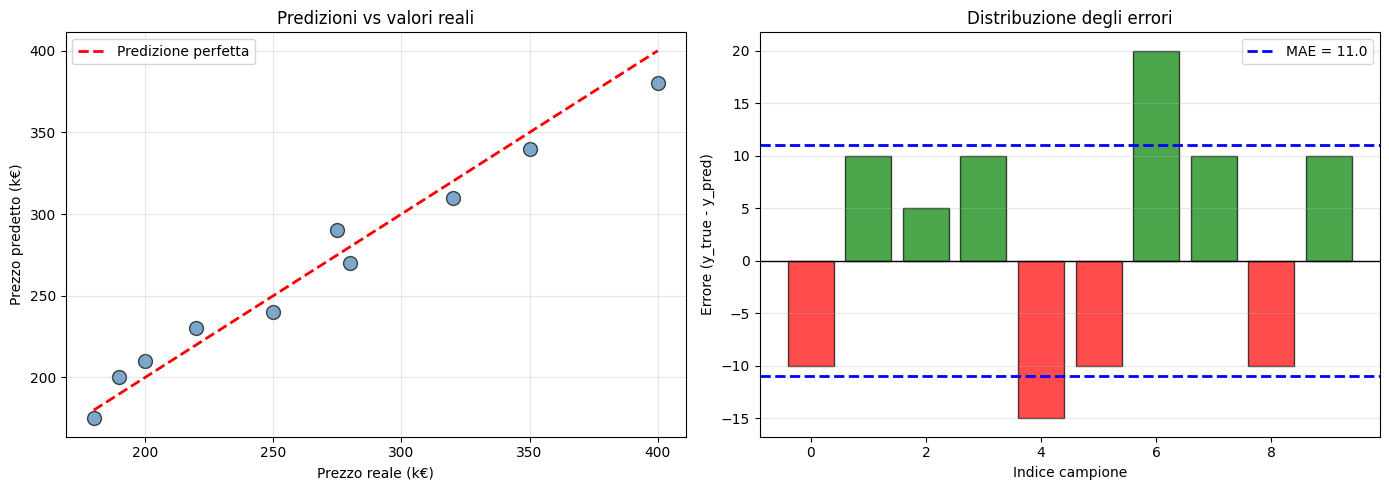

[Checkpoint] Errore massimo assoluto: 20.0 k€ — utile per parlare di worst case


In [30]:
# ============================================================
# DIMOSTRAZIONE - MAE vs MSE vs RMSE su dataset giocattolo
# Intento: mostrare come tre metriche reagiscono agli stessi errori
# Assunzioni: prezzi in migliaia di euro, niente valori mancanti
# Output: stampa delle metriche + due grafici interpretativi
# ============================================================
"""
Dataset sintetico di prezzi immobiliari (10 osservazioni).
Useremo mean_absolute_error (input: array 1D, output: float) e
mean_squared_error per calcolare MSE e, con la radice quadrata, l'RMSE.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: dati sintetici riproducibili
np.random.seed(42)
prices_true = np.array([200, 250, 180, 320, 275, 190, 400, 350, 220, 280])
prices_pred = np.array([210, 240, 175, 310, 290, 200, 380, 340, 230, 270])

# Micro-checkpoint 1: coerenza lunghezze e tipi
assert prices_true.shape == prices_pred.shape == (10,), 'Vettori non allineati: controlla i dati di input'
assert not np.isnan(prices_true).any() and not np.isnan(prices_pred).any(), 'Sono presenti NaN nei prezzi'
print('[Checkpoint] vettori caricati correttamente con forma', prices_true.shape)

# Step 2: calcolo metriche
mae = mean_absolute_error(prices_true, prices_pred)
mse = mean_squared_error(prices_true, prices_pred)
rmse = np.sqrt(mse)

print('Confronto metriche di errore (in migliaia di euro)')
print(f'MAE  = {mae:.2f}')
print(f'MSE  = {mse:.2f}')
print(f'RMSE = {rmse:.2f}')

# Micro-checkpoint 2: RMSE deve essere maggiore o uguale di MAE
assert rmse + 1e-9 >= mae, 'RMSE inferiore al MAE: probabilmente errore nel calcolo o dati trasformati'
print('[Checkpoint] RMSE >= MAE, valori coerenti con la teoria')

# Step 3: visualizzazione degli errori
errori = prices_true - prices_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: predetti vs reali
ax1 = axes[0]
ax1.scatter(prices_true, prices_pred, s=100, alpha=0.7, c='steelblue', edgecolors='black')
ax1.plot([prices_true.min(), prices_true.max()], [prices_true.min(), prices_true.max()], 'r--', linewidth=2, label='Predizione perfetta')
ax1.set_xlabel('Prezzo reale (k€)')
ax1.set_ylabel('Prezzo predetto (k€)')
ax1.set_title('Predizioni vs valori reali')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: distribuzione degli errori
ax2 = axes[1]
colors = ['green' if e >= 0 else 'red' for e in errori]
ax2.bar(range(len(errori)), errori, color=colors, edgecolor='black', alpha=0.7)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.axhline(y=mae, color='blue', linestyle='--', linewidth=2, label=f'MAE = {mae:.1f}')
ax2.axhline(y=-mae, color='blue', linestyle='--', linewidth=2)
ax2.set_xlabel('Indice campione')
ax2.set_ylabel('Errore (y_true - y_pred)')
ax2.set_title('Distribuzione degli errori')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Micro-checkpoint 3: valore massimo assoluto dell'errore
max_abs_err = np.abs(errori).max()
print(f'[Checkpoint] Errore massimo assoluto: {max_abs_err:.1f} k€ — utile per parlare di worst case')

### Mini-demo residui - perche la facciamo
Costruiamo un dataset monodimensionale per verificare visivamente e numericamente se i residui sono centrati e casuali. `LinearRegression.fit`, `stats.probplot` e `stats.shapiro` richiedono array 2D/1D coerenti; se la media dei residui non e' circa 0 o il p-value < 0.05 il modello lineare e' insufficiente e va raffinato.


Analisi dei residui (demo)

Statistiche Residui:
   Media: -0.0000 (dovrebbe essere ≈ 0)
   Std: 1.8054
   Min: -5.10, Max: 3.96
[Checkpoint] Media residui vicina a 0 → modello non biasato


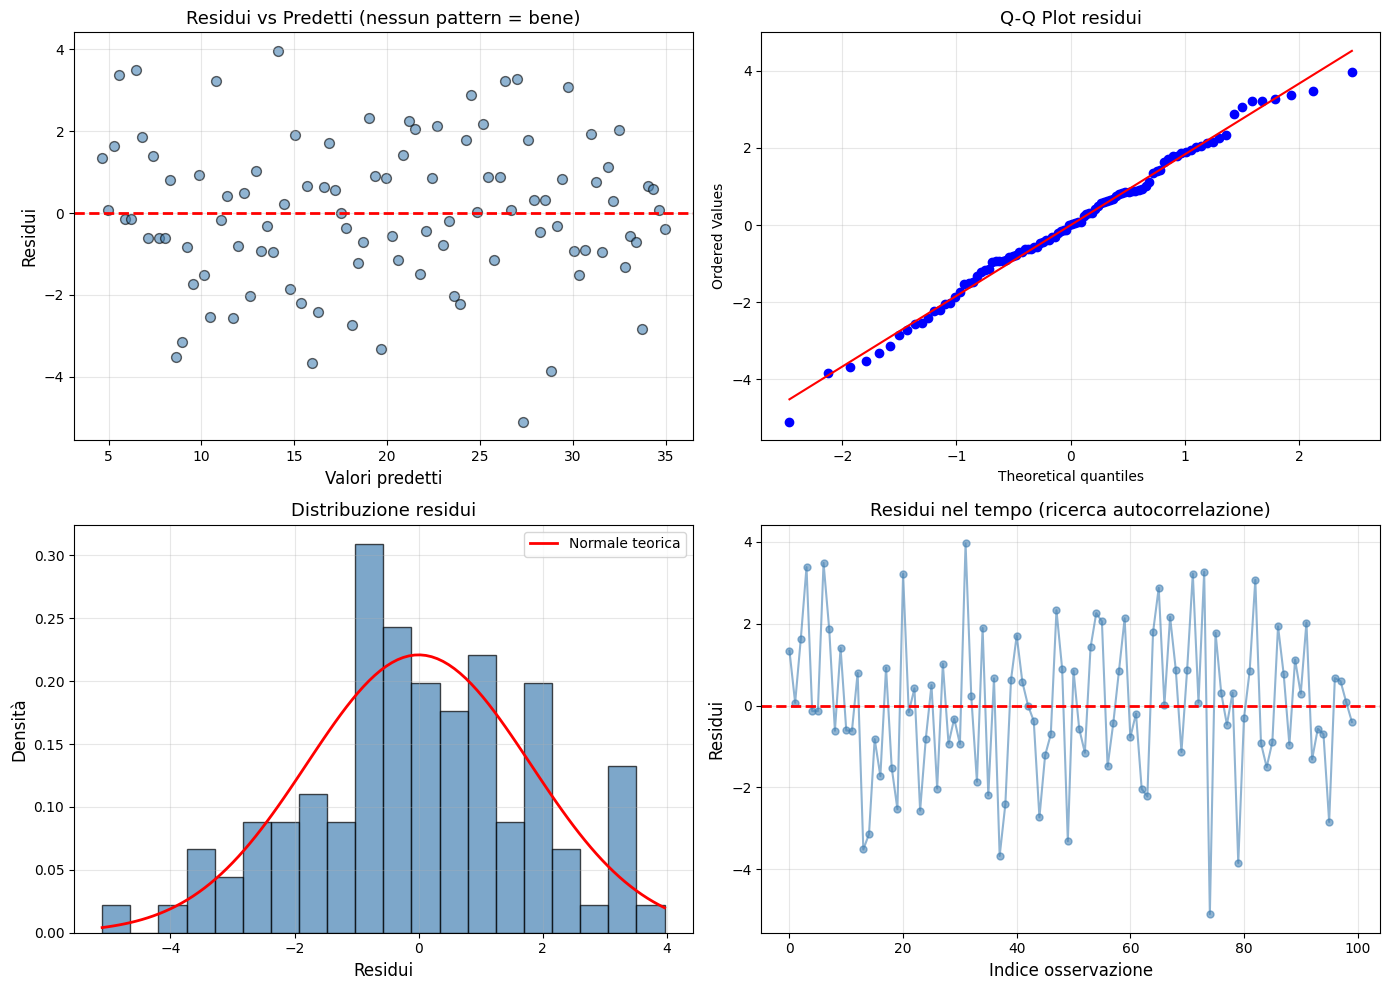


Test di Shapiro-Wilk (normalità):
   p-value = 0.7928
   Interpretazione: residui compatibili con la normalità
[Checkpoint] Se p-value < 0.05, segnare nel report di follow-up


In [31]:
# ============================================
# DEMO: Analisi dei Residui (mini pipeline)
# Intento: verificare che i residui siano centrati, indipendenti e quasi normali
# Assunzioni: relazione lineare con rumore gaussiano moderato
# Output: statistiche testuali + 4 grafici diagnostici
# ============================================

from sklearn.linear_model import LinearRegression
from scipy import stats

# Step 1: dataset artificiale con leggera rumorosità
np.random.seed(42)
X_simple = np.linspace(0, 10, 100).reshape(-1, 1)
y_simple = 3 * X_simple.flatten() + 5 + np.random.normal(0, 2, 100)
assert X_simple.shape == (100, 1), 'Shape inattesa per X_simple'

# Step 2: fitting lineare e residui
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)
y_pred_simple = model_simple.predict(X_simple)
residui = y_simple - y_pred_simple
assert residui.shape == y_simple.shape, 'Residui mal calcolati'

print('=' * 60)
print('Analisi dei residui (demo)')
print('=' * 60)
print('\nStatistiche Residui:')
print(f'   Media: {residui.mean():.4f} (dovrebbe essere ≈ 0)')
print(f'   Std: {residui.std():.4f}')
print(f'   Min: {residui.min():.2f}, Max: {residui.max():.2f}')
print('[Checkpoint] Media residui vicina a 0 → modello non biasato')

# Step 3: visualizzazioni diagnostiche
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax1 = axes[0, 0]
ax1.scatter(y_pred_simple, residui, alpha=0.6, s=50, c='steelblue', edgecolors='black')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Valori predetti', fontsize=12)
ax1.set_ylabel('Residui', fontsize=12)
ax1.set_title('Residui vs Predetti (nessun pattern = bene)', fontsize=13)
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
stats.probplot(residui, dist='norm', plot=ax2)
ax2.set_title('Q-Q Plot residui', fontsize=13)
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
ax3.hist(residui, bins=20, color='steelblue', edgecolor='black', alpha=0.7, density=True)
x_norm = np.linspace(residui.min(), residui.max(), 100)
ax3.plot(x_norm, stats.norm.pdf(x_norm, residui.mean(), residui.std()), 'r-', linewidth=2, label='Normale teorica')
ax3.set_xlabel('Residui', fontsize=12)
ax3.set_ylabel('Densità', fontsize=12)
ax3.set_title('Distribuzione residui', fontsize=13)
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
ax4.plot(residui, 'o-', alpha=0.6, markersize=5, color='steelblue')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Indice osservazione', fontsize=12)
ax4.set_ylabel('Residui', fontsize=12)
ax4.set_title('Residui nel tempo (ricerca autocorrelazione)', fontsize=13)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 4: test di normalità
_, p_value = stats.shapiro(residui)
print('\nTest di Shapiro-Wilk (normalità):')
print(f'   p-value = {p_value:.4f}')
if p_value > 0.05:
    print('   Interpretazione: residui compatibili con la normalità')
else:
    print('   Interpretazione: residui non normali, valutare trasformazioni')
print('[Checkpoint] Se p-value < 0.05, segnare nel report di follow-up')

---

## Sezione 5 - Esercizi guidati passo passo
Segui l'ordine 18.1 -> 18.5: ogni esercizio riusa dati/variabili precedenti e contiene checkpoint obbligatori.


#### 5.1 Esercizio 18.1 - Focus e requisiti
- Metodi: `mean_absolute_error`, `mean_squared_error`, `matplotlib.pyplot`.
- Input: due vettori NumPy 1D dello stesso size (10) senza NaN.
- Output: MAE/MSE/RMSE, grafico predetti vs reali, barre degli errori.
- Errori tipici: shape diversa o stringhe/NaN -> `ValueError` da `sklearn.metrics`.


#### 5.1.1 Passi guidati e output atteso
**Domanda**: quanto cambiano le tre metriche sugli stessi errori?
1) Riusa i vettori `prices_true` e `prices_pred` creati nella dimostrazione (Sezione 4).
2) Calcola MAE/MSE/RMSE ed esegui i checkpoint su forme e NaN.
3) Leggi i grafici: linea rossa = perfetto, barre colorate = errori positivi/negativi.
4) Controlla RMSE >= MAE; se non accade, ricontrolla input/trasformazioni.
**Output atteso**: metriche in kEUR, grafico predetti vs reali, grafico errori con soglia MAE evidenziata.


#### 5.2 Esercizio 18.2 - R^2 e R^2 aggiustato (rationale + passi)
Perche: mostrare come R^2_adj penalizza feature inutili quando la dimensionalita' cresce e come il rumore degrada i punteggi.
Passi: genera dati con `make_regression`, addestra `LinearRegression`, calcola R^2/R^2_adj, verifica range [-1,1], osserva la barra del rumore.


[Checkpoint] Dataset sintetico creato con forma (100, 5)
R² e R² aggiustato su dataset sintetico
Campioni: 100 | Feature: 5
R²      = 0.9870
R² adj  = 0.9863
[Checkpoint] R² e R² adj coerenti con la teoria


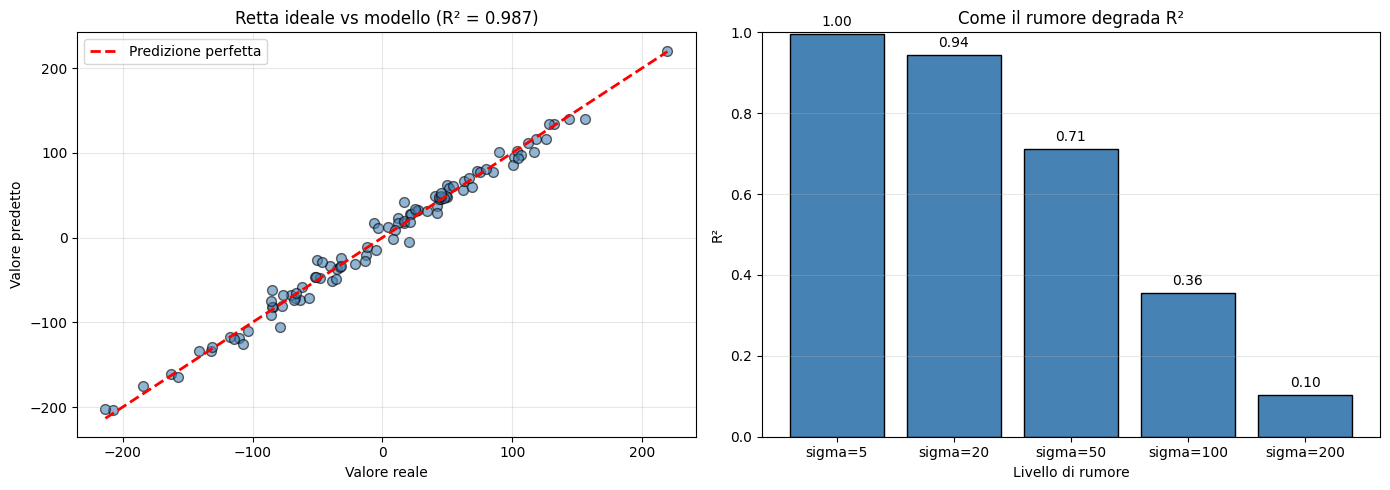

[Checkpoint] Rumore alto → R² vicino a 0: interpretazione coerente


In [32]:
# ============================================================
# ESERCIZIO 18.2 - R² e R² aggiustato (effetto delle feature e del rumore)
# Intento: mostrare perché R² adj penalizza feature inutili
# Assunzioni: dataset sintetico generato da make_regression con seed fisso
# Output: tabella dei punteggi + 2 grafici per residui e rumore
# ============================================================
"""
make_regression(n_samples, n_features, n_informative, noise) -> (X, y)
- Input: specifiche intere per dimensioni e rumore; restituisce X (n, p) e y (n,).
LinearRegression.fit(X, y) addestra il modello (X deve essere array 2D, y array 1D).
r2_score(y_true, y_pred) restituisce float in [-inf, 1]; valori fuori range indicano errori di scala.
"""

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Step 1: generazione dati controllata
X, y = make_regression(n_samples=100, n_features=5, n_informative=3, noise=10, random_state=42)
assert X.shape == (100, 5) and y.shape == (100,), "Shape inattesa da make_regression"
print('[Checkpoint] Dataset sintetico creato con forma', X.shape)

# Step 2: addestramento modello base e calcolo punteggi
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
assert y_pred.shape == y.shape, "Predizioni con shape diversa da y"

r2 = r2_score(y, y_pred)
n = len(y)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('R² e R² aggiustato su dataset sintetico')
print(f'Campioni: {n} | Feature: {p}')
print(f'R²      = {r2:.4f}')
print(f'R² adj  = {r2_adj:.4f}')

# Micro-checkpoint: range e coerenza
assert -1 <= r2 <= 1, 'R² fuori range: controlla normalizzazione o target'
assert r2_adj <= r2 + 1e-9, 'R² adj deve essere <= R² salvo arrotondamenti'
print('[Checkpoint] R² e R² adj coerenti con la teoria')

# Step 3: grafico predetti vs reali
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1 = axes[0]
ax1.scatter(y, y_pred, alpha=0.6, s=50, c='steelblue', edgecolors='black')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Predizione perfetta')
ax1.set_xlabel('Valore reale')
ax1.set_ylabel('Valore predetto')
ax1.set_title(f'Retta ideale vs modello (R² = {r2:.3f})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Step 4: simulazione impatto rumore
noise_levels = [5, 20, 50, 100, 200]
r2_scores = []
for noise in noise_levels:
    X_tmp, y_tmp = make_regression(n_samples=100, n_features=3, n_informative=3, noise=noise, random_state=42)
    mdl_tmp = LinearRegression().fit(X_tmp, y_tmp)
    r2_scores.append(r2_score(y_tmp, mdl_tmp.predict(X_tmp)))
assert len(r2_scores) == len(noise_levels), 'Numero di simulazioni inconsistente'

ax2 = axes[1]
ax2.bar(range(len(noise_levels)), r2_scores, color='steelblue', edgecolor='black')
ax2.set_xticks(range(len(noise_levels)))
ax2.set_xticklabels([f'sigma={n}' for n in noise_levels])
ax2.set_xlabel('Livello di rumore')
ax2.set_ylabel('R²')
ax2.set_title('Come il rumore degrada R²')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3, axis='y')
for i, r_tmp in enumerate(r2_scores):
    ax2.text(i, r_tmp + 0.02, f'{r_tmp:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print('[Checkpoint] Rumore alto → R² vicino a 0: interpretazione coerente')

#### 5.3 Esercizio 18.3 - MAPE e confronto metriche (overview)
- Calcola MAE, RMSE, MAPE e R^2 sul dataset 18.1.
- Confronta errori assoluti vs percentuali per decidere cosa comunicare.
- Checkpoint: nessun target pari a 0, MAPE >= 0, R^2 nel range.


#### 5.3.1 Perche questo passo (MAPE)
Usiamo `mean_absolute_percentage_error` e `r2_score` sugli stessi dati di 18.1 per leggere sia errori assoluti sia percentuali. Il confronto visivo aiuta a capire quando comunicare il MAPE a stakeholder non tecnici e include checkpoint su denominatori non nulli e range delle metriche.


MAPE e confronto metriche
MAE  = 11.00
RMSE = 11.62
MAPE = 4.16%
R²   = 0.9719
[Checkpoint] Metriche calcolate con valori plausibili


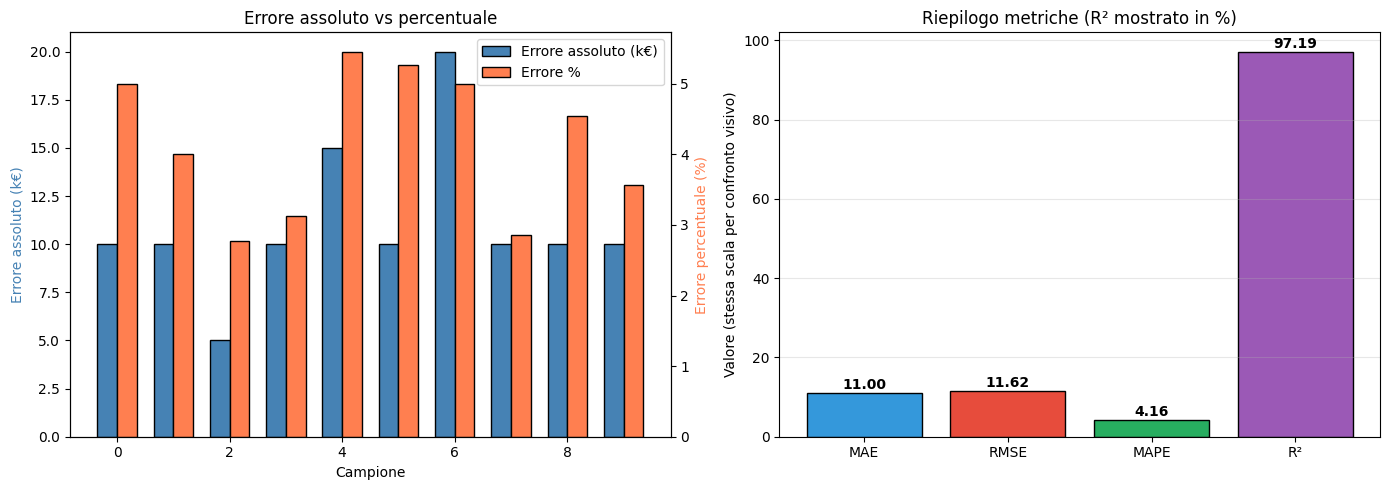

[Checkpoint] Grafici generati: confronta barre per capire sensibilità alle percentuali


In [33]:
# ============================================================
# ESERCIZIO 18.3 - MAPE e confronto metriche
# Intento: mostrare MAE/RMSE vs MAPE sullo stesso dataset
# Assunzioni: prezzi non nulli (requisito di MAPE)
# Output: stampa delle metriche e 2 grafici comparativi
# ============================================================
"""
mean_absolute_percentage_error(y_true, y_pred): richiede array 1D della stessa lunghezza e target non nulli; restituisce float in [0, inf).
r2_score(y_true, y_pred): misura varianza spiegata rispetto alla media; attenzione a target costanti.
"""

from sklearn.metrics import mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: riutilizzo vettori e metriche dell'esercizio 18.1
assert 'prices_true' in globals() and 'prices_pred' in globals(), 'Esegui prima la dimostrazione/Es.18.1'
assert 'mae' in globals() and 'rmse' in globals(), 'Calcola MAE/RMSE nell esercizio 18.1 prima di procedere'
assert np.all(prices_true != 0), 'MAPE non definito con target pari a zero'

mape = mean_absolute_percentage_error(prices_true, prices_pred) * 100
r2_local = r2_score(prices_true, prices_pred)

print('MAPE e confronto metriche')
print(f'MAE  = {mae:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'MAPE = {mape:.2f}%')
print(f'R²   = {r2_local:.4f}')

# Micro-checkpoint: range delle metriche
assert mape >= 0, 'MAPE non può essere negativo'
assert -1 <= r2_local <= 1, 'R² locale fuori range'
print('[Checkpoint] Metriche calcolate con valori plausibili')

# Step 2: grafici comparativi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

errori_abs = np.abs(prices_true - prices_pred)
errori_perc = np.abs((prices_true - prices_pred) / prices_true) * 100
x_pos = np.arange(len(prices_true))
width = 0.35

ax1 = axes[0]
ax1.bar(x_pos - width/2, errori_abs, width, label='Errore assoluto (k€)', color='steelblue', edgecolor='black')
ax1_t = ax1.twinx()
ax1_t.bar(x_pos + width/2, errori_perc, width, label='Errore %', color='coral', edgecolor='black')
ax1.set_xlabel('Campione')
ax1.set_ylabel('Errore assoluto (k€)', color='steelblue')
ax1_t.set_ylabel('Errore percentuale (%)', color='coral')
ax1.set_title('Errore assoluto vs percentuale')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_t.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

ax2 = axes[1]
metriche = ['MAE', 'RMSE', 'MAPE', 'R²']
valori = [mae, rmse, mape, r2_local * 100]
colori = ['#3498db', '#e74c3c', '#27ae60', '#9b59b6']
bars = ax2.bar(metriche, valori, color=colori, edgecolor='black')
ax2.set_ylabel('Valore (stessa scala per confronto visivo)')
ax2.set_title('Riepilogo metriche (R² mostrato in %)')
for bar, val in zip(bars, valori):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{val:.2f}', ha='center', fontsize=10, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print('[Checkpoint] Grafici generati: confronta barre per capire sensibilità alle percentuali')

#### 5.3 bis - Esercizio 18.3 (esteso) - Diagnosi residui
Mostriamo come un modello lineare puo' sbagliare quando la relazione e' quadratica e come un modello polinomiale corregge la situazione. I grafici dei residui guidano la scelta del modello: pattern a U -> aggiungere termini quadratici; residui casuali -> specifica adeguata.


ESERCIZIO 18.3 — Diagnosi con Analisi Residui (esteso)

Dataset con relazione quadratica nascosta: y = 5 + 2x + 0.5x^2 + rumore

Modello Lineare:
   R² = 0.9603
   RMSE = 4.1576

Modello Polinomiale (grado 2):
   R² = 0.9921
   RMSE = 1.8522
[Checkpoint] R² polinomiale deve superare quello lineare


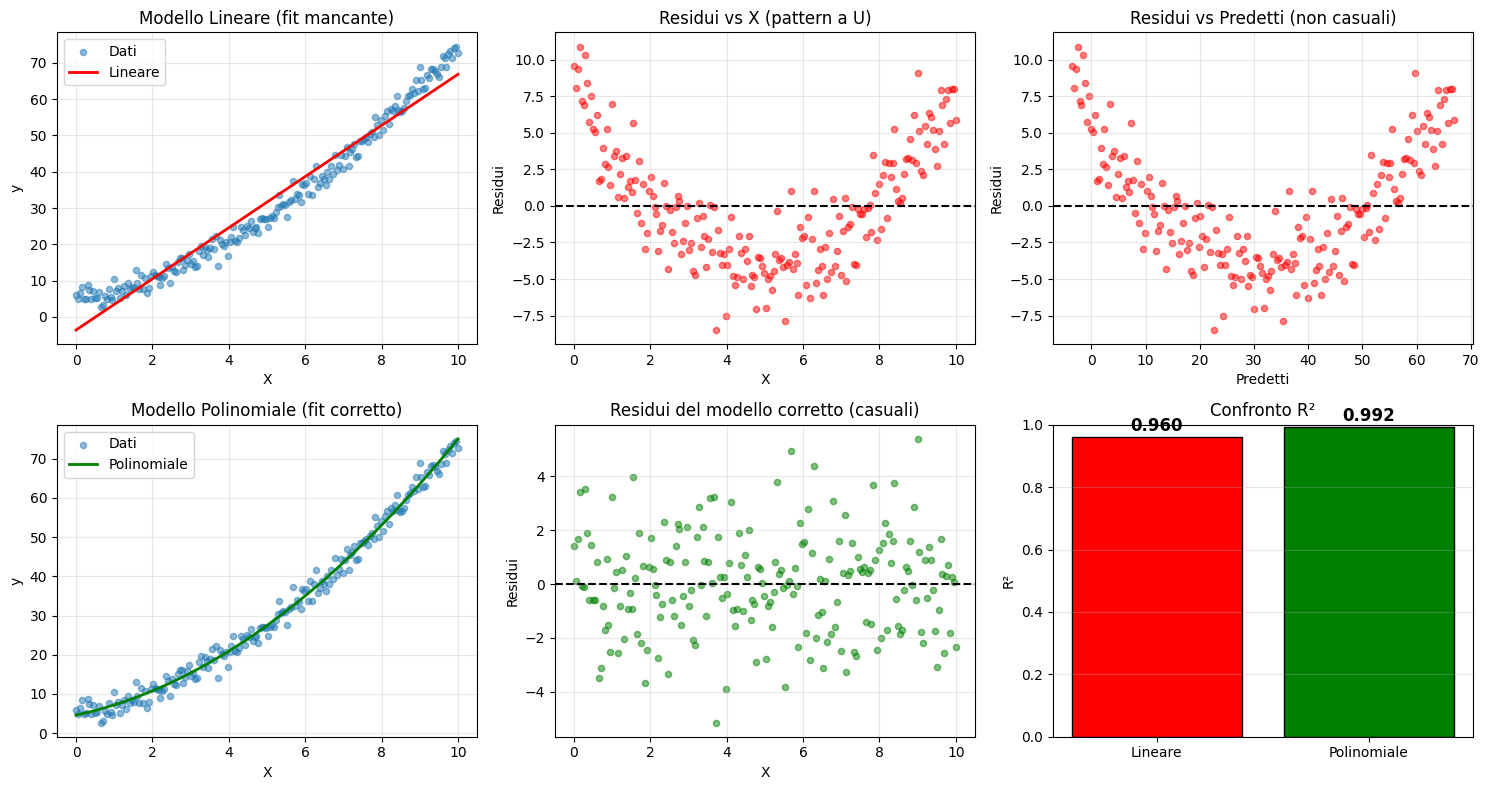


Diagnosi completata: i residui irregolari hanno suggerito di arricchire il modello con termini quadratici.


In [34]:
# ============================================
# ESERCIZIO 18.3 (esteso) — Diagnosi con analisi residui
# Intento: mostrare come i residui smascherano una relazione quadratica non modellata
# Assunzioni: dati generati con polinomio di grado 2 + rumore
# Output: grafici comparativi, metriche R²/RMSE, checklist finale
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

print('=' * 60)
print('ESERCIZIO 18.3 — Diagnosi con Analisi Residui (esteso)')
print('=' * 60)

# Step 1: dati con relazione quadratica
X = np.linspace(0, 10, 200).reshape(-1, 1)
y_true_curve = 5 + 2 * X.flatten() + 0.5 * X.flatten() ** 2
noise = np.random.normal(0, 2, 200)
y = y_true_curve + noise
assert X.shape == (200, 1), 'Shape inattesa per X'

print('\nDataset con relazione quadratica nascosta: y = 5 + 2x + 0.5x^2 + rumore')

# Step 2: modello lineare (volutamente misspecified)
model_lineare = LinearRegression()
model_lineare.fit(X, y)
y_pred_lin = model_lineare.predict(X)
residui_lin = y - y_pred_lin

r2_lin = r2_score(y, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
print('\nModello Lineare:')
print(f'   R² = {r2_lin:.4f}')
print(f'   RMSE = {rmse_lin:.4f}')

# Step 3: grafici diagnostici per il modello sbagliato
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
ax1 = axes[0, 0]
ax1.scatter(X, y, alpha=0.5, s=20, label='Dati')
ax1.plot(X, y_pred_lin, 'r-', linewidth=2, label='Lineare')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Modello Lineare (fit mancante)')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
ax2.scatter(X, residui_lin, alpha=0.5, s=20, c='red')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('X')
ax2.set_ylabel('Residui')
ax2.set_title('Residui vs X (pattern a U)')
ax2.grid(True, alpha=0.3)

ax3 = axes[0, 2]
ax3.scatter(y_pred_lin, residui_lin, alpha=0.5, s=20, c='red')
ax3.axhline(y=0, color='black', linestyle='--')
ax3.set_xlabel('Predetti')
ax3.set_ylabel('Residui')
ax3.set_title('Residui vs Predetti (non casuali)')
ax3.grid(True, alpha=0.3)

# Step 4: modello polinomiale che rispetta la relazione
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
model_poly.fit(X, y)
y_pred_poly = model_poly.predict(X)
residui_poly = y - y_pred_poly

r2_poly = r2_score(y, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
print('\nModello Polinomiale (grado 2):')
print(f'   R² = {r2_poly:.4f}')
print(f'   RMSE = {rmse_poly:.4f}')
print('[Checkpoint] R² polinomiale deve superare quello lineare')
assert r2_poly > r2_lin, 'Il modello polinomiale non ha migliorato il R²'

ax4 = axes[1, 0]
ax4.scatter(X, y, alpha=0.5, s=20, label='Dati')
ax4.plot(X, y_pred_poly, 'g-', linewidth=2, label='Polinomiale')
ax4.set_xlabel('X')
ax4.set_ylabel('y')
ax4.set_title('Modello Polinomiale (fit corretto)')
ax4.legend()
ax4.grid(True, alpha=0.3)

ax5 = axes[1, 1]
ax5.scatter(X, residui_poly, alpha=0.5, s=20, c='green')
ax5.axhline(y=0, color='black', linestyle='--')
ax5.set_xlabel('X')
ax5.set_ylabel('Residui')
ax5.set_title('Residui del modello corretto (casuali)')
ax5.grid(True, alpha=0.3)

ax6 = axes[1, 2]
modelli = ['Lineare', 'Polinomiale']
r2_vals = [r2_lin, r2_poly]
colors = ['red', 'green']
bars = ax6.bar(modelli, r2_vals, color=colors, edgecolor='black')
ax6.set_ylabel('R²')
ax6.set_title('Confronto R²')
ax6.set_ylim(0, 1)
for bar, val in zip(bars, r2_vals):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{val:.3f}', ha='center', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print('\n' + '=' * 60)
print('Diagnosi completata: i residui irregolari hanno suggerito di arricchire il modello con termini quadratici.')
print('=' * 60)

#### 5.4 Esercizio 18.4 - Report completo e residui (overview)
- Dataset immobiliare sintetico con 4 feature, split train/test.
- Metriche: MAE, RMSE, MAPE, R^2, R^2 adj + analisi residui e coefficienti.
- Output: tabella metriche, 4 grafici diagnostici, mini-report business.


#### 5.4.1 Perche questo passo
Costruiamo un dataset immobiliare sintetico, lo dividiamo con `train_test_split`, addestriamo `LinearRegression` e produciamo un report completo di metriche e residui. Questa cella consolida l'intero flusso operativo: generazione dati -> modellazione -> valutazione -> insight business. I checkpoint impediscono forme errate, NaN e indicano se i residui stanno violando le ipotesi di base.


[Checkpoint] Dataset immobiliare pronto con 500 righe
Report valutazione modello
MAE   = 20,773 €
RMSE  = 26,755 €
MAPE  = 8.97%
R²    = 0.8555
R² adj= 0.8494
[Checkpoint] Metriche coerenti e finite

Analisi residui
Media residui = 2692.90 €
Std residui   = 26753.65 €
Test Shapiro p-value = 0.3885
Interpretazione: residui compatibili con normalità


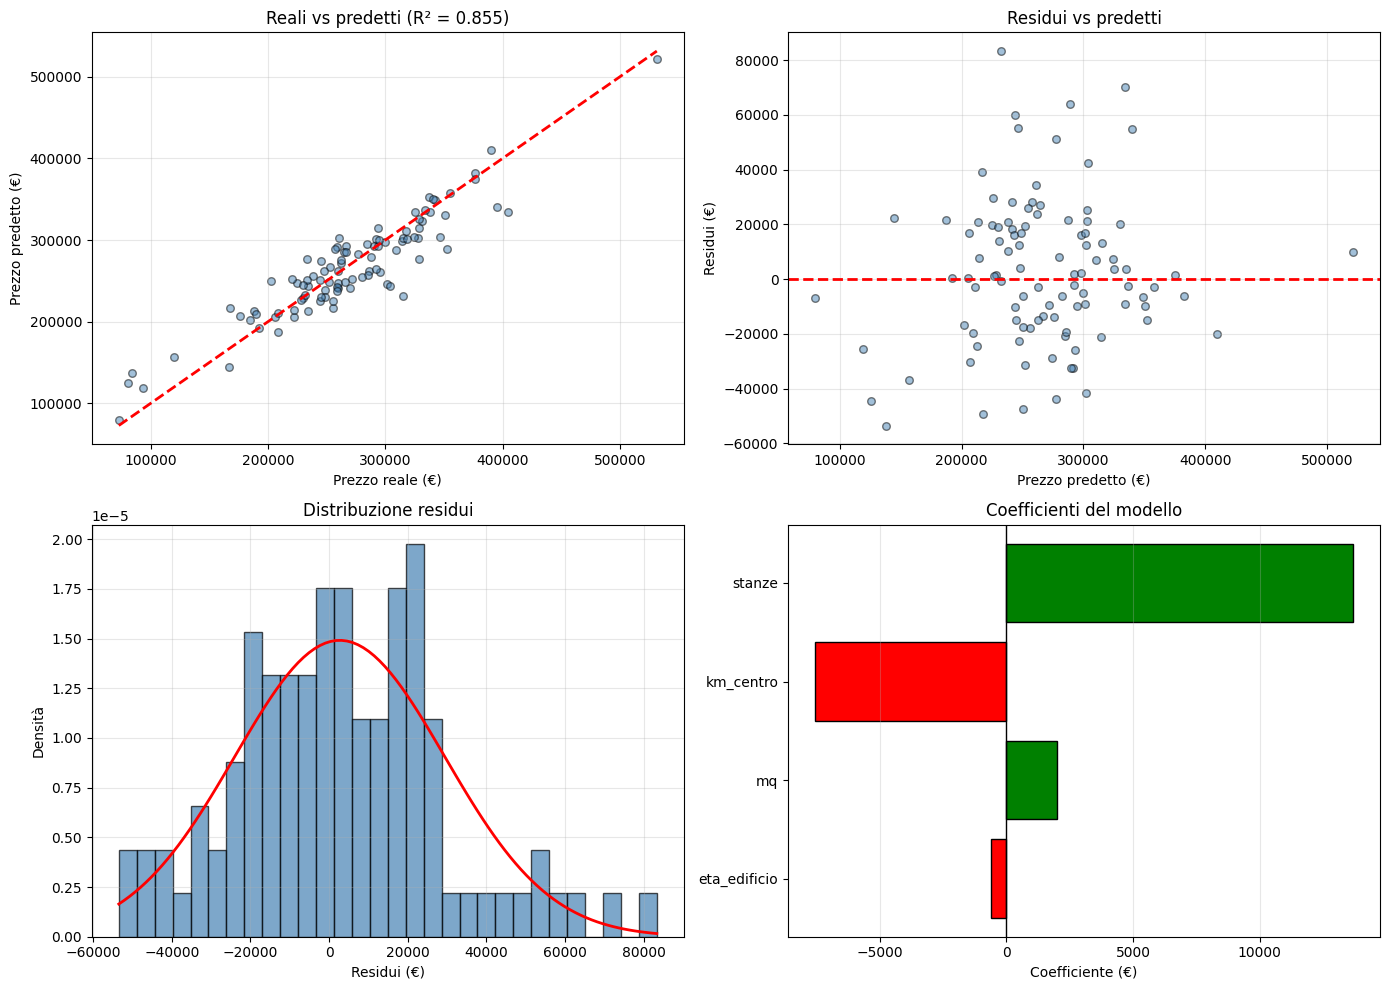


Mini-report business
Errore medio assoluto: 20,773 €
Errore percentuale medio: 9.0%
Impatti delle feature:
+1 mq -> +1,990 €
+1 stanza -> +13,685 €
+1 anno di eta -> -607 €
+1 km dal centro -> -7,546 €
[Checkpoint] Report business generato: condividere soglie accettabili con stakeholder


In [35]:
# ============================================================
# ESERCIZIO 18.4 - Report completo con residui
# Intento: eseguire l'intera pipeline regressione → metriche → diagnosi residui → insight business
# Assunzioni: dataset sintetico con relazione quasi lineare, varianza costante
# Output: metriche tabellari, 4 grafici diagnostici, mini-report testuale
# ============================================================
"""
train_test_split(X, y, test_size, random_state) suddivide gli array (X: DataFrame/array 2D, y: Serie/array 1D) restituendo quattro insiemi coerenti.
LinearRegression.fit(X_train, y_train) addestra il modello minimo quadrati; predict restituisce array 1D con stessa lunghezza di y_test.
mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score: tutte richiedono y_true e y_pred di uguale forma.
stats.shapiro(residui) restituisce statistica e p-value per testare la normalità dei residui.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy import stats

# Step 1: generazione dataset immobiliare sintetico
np.random.seed(42)
n_case = 500
mq = np.random.normal(100, 30, n_case)
stanze = np.random.randint(2, 6, n_case)
eta = np.random.randint(0, 50, n_case)
distanza_centro = np.random.exponential(3, n_case)

prezzo = (
    50000 +
    2000 * mq +
    15000 * stanze -
    500 * eta -
    8000 * distanza_centro +
    np.random.normal(0, 30000, n_case)
)
prezzo = np.clip(prezzo, 50000, None)

df = pd.DataFrame({
    'mq': mq,
    'stanze': stanze,
    'eta_edificio': eta,
    'km_centro': distanza_centro,
    'prezzo': prezzo
})
assert df.shape == (n_case, 5), 'DataFrame non ha il numero atteso di colonne'
assert not df.isna().any().any(), 'Sono comparsi NaN nella fase di generazione'
print('[Checkpoint] Dataset immobiliare pronto con', df.shape[0], 'righe')

# Step 2: split e addestramento
X = df[['mq', 'stanze', 'eta_edificio', 'km_centro']]
y = df['prezzo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
assert X_train.shape[0] + X_test.shape[0] == n_case, 'Split train/test incoerente'
assert X_train.shape[1] == 4, 'Numero di feature inatteso'

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
assert y_pred.shape == y_test.shape, 'Predizioni con lunghezza errata'

# Step 3: calcolo metriche
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
residui = y_test - y_pred
print('Report valutazione modello')
print(f'MAE   = {mae:,.0f} €')
print(f'RMSE  = {rmse:,.0f} €')
print(f'MAPE  = {mape:.2f}%')
print(f'R²    = {r2:.4f}')
print(f'R² adj= {r2_adj:.4f}')

# Micro-checkpoint metriche
assert mae > 0 and rmse > 0, 'Le metriche devono essere positive'
assert r2_adj <= r2 + 1e-9, 'R² aggiustato non può superare R²'
print('[Checkpoint] Metriche coerenti e finite')

print('\nAnalisi residui')
print(f'Media residui = {residui.mean():.2f} €')
print(f'Std residui   = {residui.std():.2f} €')
_, shapiro_p = stats.shapiro(residui.sample(min(50, len(residui)), random_state=42))
print(f'Test Shapiro p-value = {shapiro_p:.4f}')
if shapiro_p < 0.05:
    print('Interpretazione: residui non perfettamente normali → nota per follow-up')
else:
    print('Interpretazione: residui compatibili con normalità')

# Step 4: visualizzazioni
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax1 = axes[0, 0]
ax1.scatter(y_test, y_pred, alpha=0.5, s=30, c='steelblue', edgecolors='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
ax1.set_xlabel('Prezzo reale (€)')
ax1.set_ylabel('Prezzo predetto (€)')
ax1.set_title(f'Reali vs predetti (R² = {r2:.3f})')
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
ax2.scatter(y_pred, residui, alpha=0.5, s=30, c='steelblue', edgecolors='black')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Prezzo predetto (€)')
ax2.set_ylabel('Residui (€)')
ax2.set_title('Residui vs predetti')
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
ax3.hist(residui, bins=30, color='steelblue', edgecolor='black', alpha=0.7, density=True)
x_norm = np.linspace(residui.min(), residui.max(), 100)
ax3.plot(x_norm, stats.norm.pdf(x_norm, residui.mean(), residui.std()), 'r-', linewidth=2)
ax3.set_xlabel('Residui (€)')
ax3.set_ylabel('Densità')
ax3.set_title('Distribuzione residui')
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficiente': model.coef_
}).sort_values('Coefficiente', key=abs, ascending=True)
colors = ['green' if c > 0 else 'red' for c in coef_df['Coefficiente']]
ax4.barh(coef_df['Feature'], coef_df['Coefficiente'], color=colors, edgecolor='black')
ax4.axvline(x=0, color='black', linewidth=1)
ax4.set_xlabel('Coefficiente (€)')
ax4.set_title('Coefficienti del modello')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print('\nMini-report business')
print(f'Errore medio assoluto: {mae:,.0f} €')
print(f'Errore percentuale medio: {mape:.1f}%')
print('Impatti delle feature:')
print(f'+1 mq -> +{model.coef_[0]:,.0f} €')
print(f'+1 stanza -> +{model.coef_[1]:,.0f} €')
print(f'+1 anno di eta -> {model.coef_[2]:,.0f} €')
print(f'+1 km dal centro -> {model.coef_[3]:,.0f} €')
print('[Checkpoint] Report business generato: condividere soglie accettabili con stakeholder')

#### 5.5 Esercizio 18.5 - Confronto modelli (overview)
- Confronto Linear Regression, Ridge, Random Forest sullo stesso split.
- Metriche: MAE, RMSE, MAPE, R^2 con evidenza dei vincitori per metrica.
- Uso: motivare la scelta del modello in base al criterio business concordato.


#### 5.5.1 Perche questo passo
Confrontiamo tre modelli (`LinearRegression`, `Ridge`, `RandomForestRegressor`) sugli stessi dati per mettere in pratica la lettura multi-metrica. Verifichiamo forma di `X` e `y`, corretto split, e che ogni metrica abbia un vincitore coerente; checkpoint e assert bloccano shape errate e metriche non positive.


Confronto modelli
          Modello       MAE      RMSE  MAPE   R²
Linear Regression 20,773.50 26,755.41  8.97 0.86
  Ridge (alpha=1) 20,774.37 26,758.92  8.97 0.86
    Random Forest 24,854.89 33,766.10 11.51 0.77


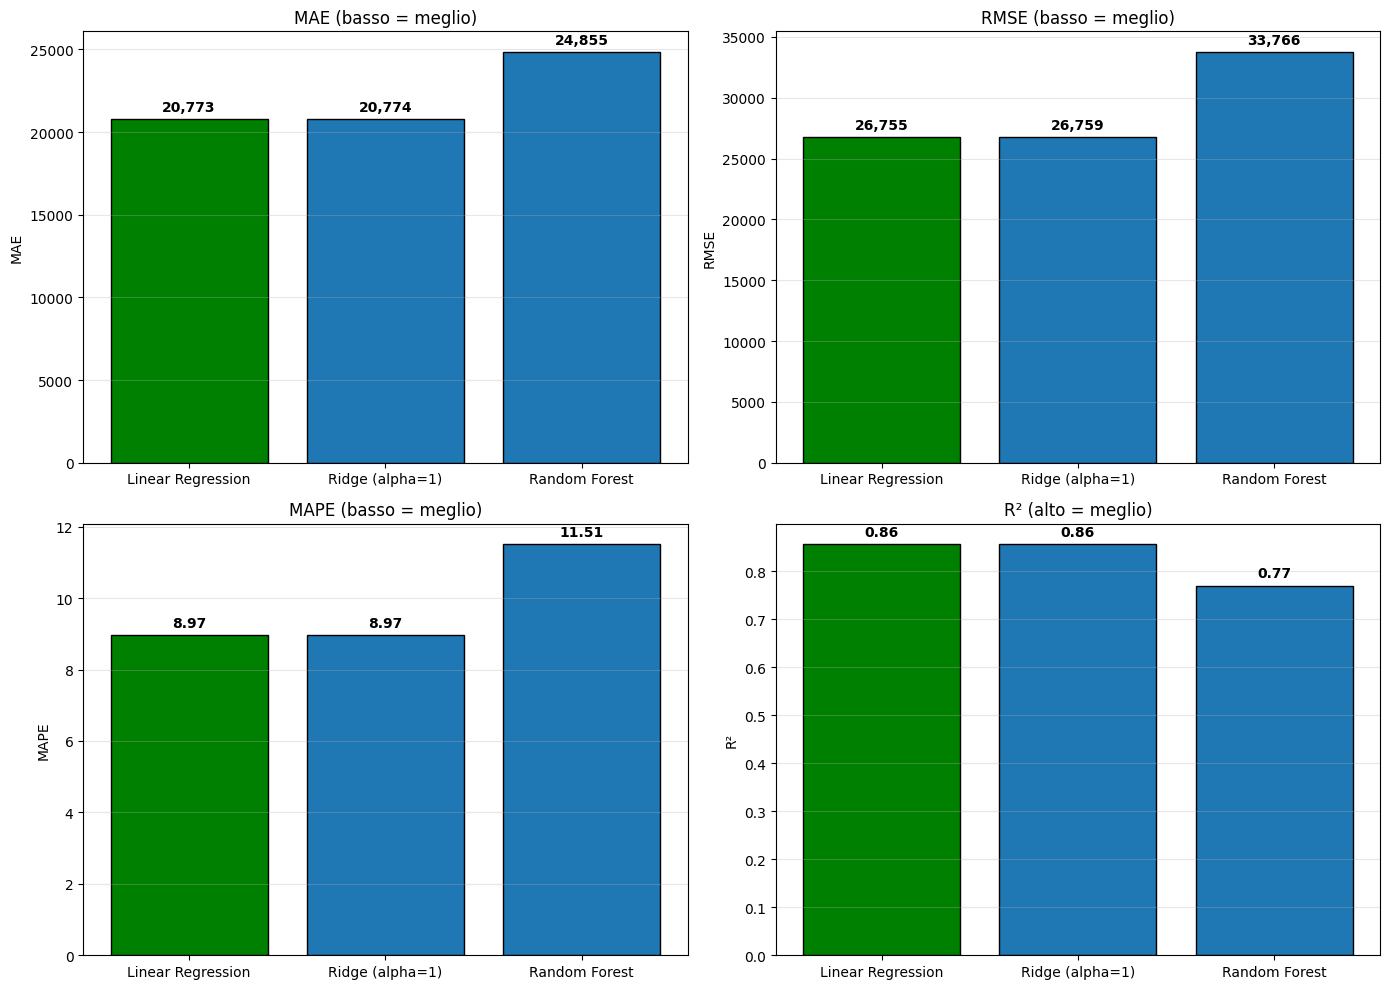


Vincitori per metrica:
MAE: Linear Regression
RMSE: Linear Regression
MAPE: Linear Regression
R²: Linear Regression
Vincitore assoluto: Linear Regression (4 metriche su 4)
[Checkpoint] Nessun modello vince tutte le metriche → discutere con stakeholder quale criterio privilegiare


In [36]:
# ============================================================
# ESERCIZIO 18.5 - Confronto modelli su dataset immobiliare
# Intento: confrontare MAE/RMSE/MAPE/R² di Linear, Ridge e Random Forest
# Assunzioni: stessa train/test split, medesimo seed per equità
# Output: tabella metriche, 4 grafici per metrica, riepilogo vincitori
# ============================================================
"""
Ridge(alpha) segue la stessa API di LinearRegression ma con penalizzazione L2.
RandomForestRegressor(n_estimators, random_state) accetta array 2D per X e restituisce predizioni 1D.
mean_absolute_percentage_error richiede target > 0; r2_score può diventare negativo se il modello è peggiore della media.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from collections import Counter

np.random.seed(42)

# Step 1: rigenerazione dataset per confronto equo
n_case = 500
mq = np.random.normal(100, 30, n_case)
stanze = np.random.randint(2, 6, n_case)
eta = np.random.randint(0, 50, n_case)
distanza_centro = np.random.exponential(3, n_case)

prezzo = 50000 + 2000 * mq + 15000 * stanze - 500 * eta - 8000 * distanza_centro + np.random.normal(0, 30000, n_case)
prezzo = np.clip(prezzo, 50000, None)

X = np.column_stack([mq, stanze, eta, distanza_centro])
y = prezzo
assert X.shape == (n_case, 4) and y.shape == (n_case,), 'Shape inconsistente durante il confronto'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
assert X_train.shape[0] == 400 and X_test.shape[0] == 100, 'Split non riproducibile'

# Step 2: addestramento modelli e calcolo metriche
modelli = {
    'Linear Regression': LinearRegression(),
    'Ridge (alpha=1)': Ridge(alpha=1),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
}

risultati = []
for nome, modello in modelli.items():
    modello.fit(X_train, y_train)
    y_pred = modello.predict(X_test)
    assert y_pred.shape == y_test.shape, f'Predizioni con shape errata per {nome}'
    risultati.append({
        'Modello': nome,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred) * 100,
        'R²': r2_score(y_test, y_pred)
    })

# Step 3: tabella e checkpoint
df_risultati = pd.DataFrame(risultati)
print('Confronto modelli')
print(df_risultati.to_string(index=False, float_format=lambda x: f"{x:,.2f}"))
assert len(df_risultati) == 3, 'Devono esserci tre modelli in tabella'
assert (df_risultati[['MAE', 'RMSE', 'MAPE']].values > 0).all(), 'Metriche non positive: controlla dati'

# Step 4: visualizzazioni per metrica
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metriche = ['MAE', 'RMSE', 'MAPE', 'R²']
titoli = ['MAE (basso = meglio)', 'RMSE (basso = meglio)', 'MAPE (basso = meglio)', 'R² (alto = meglio)']

for idx, (metrica, titolo) in enumerate(zip(metriche, titoli)):
    ax = axes[idx // 2, idx % 2]
    valori = df_risultati[metrica].values
    best_idx = np.argmax(valori) if metrica == 'R²' else np.argmin(valori)
    colors = ['green' if i == best_idx else '#1f77b4' for i in range(len(valori))]
    bars = ax.bar(df_risultati['Modello'], valori, color=colors, edgecolor='black')
    ax.set_ylabel(metrica)
    ax.set_title(titolo)
    ax.grid(True, alpha=0.3, axis='y')
    for bar, val in zip(bars, valori):
        fmt = f'{val:.2f}' if metrica in ['MAPE', 'R²'] else f'{val:,.0f}'
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02 * max(valori), fmt, ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Step 5: riepilogo vincitori
vincitori = {
    'MAE': df_risultati.loc[df_risultati['MAE'].idxmin(), 'Modello'],
    'RMSE': df_risultati.loc[df_risultati['RMSE'].idxmin(), 'Modello'],
    'MAPE': df_risultati.loc[df_risultati['MAPE'].idxmin(), 'Modello'],
    'R²': df_risultati.loc[df_risultati['R²'].idxmax(), 'Modello']
}
print('\nVincitori per metrica:')
for metrica, modello in vincitori.items():
    print(f'{metrica}: {modello}')

conteggio = Counter(vincitori.values())
vincitore_assoluto = conteggio.most_common(1)[0]
print(f'Vincitore assoluto: {vincitore_assoluto[0]} ({vincitore_assoluto[1]} metriche su 4)')
print('[Checkpoint] Nessun modello vince tutte le metriche → discutere con stakeholder quale criterio privilegiare')

---

## Sezione 6 — Conclusioni operative

### 6.1 Cosa portare a casa
- Le metriche devono essere scelte in funzione dell'uso: MAE/RMSE per interpretabilità tecnica, MAPE per la comunicazione, $R^2_{adj}$ per confrontare modelli con numero di feature diverso.
- I residui sono la cartina tornasole: se mostrano pattern, cambiare modello o ingegneria delle feature prima di fidarsi delle metriche aggregate.
- I checkpoint (shape, NaN, range delle metriche) vanno esplicitati perché prevengono errori silenziosi e rendono l'analisi ripetibile.

### 6.2 Methods explained (reference)
| Metodo/Funzione | Cosa fa | Input (tipo/shape) | Output | Tipici errori/sintomi | Quando usarlo / evitarlo |
|-----------------|---------|--------------------|--------|-----------------------|---------------------------|
| `mean_absolute_error` | Media degli errori assoluti | `y_true`, `y_pred` array 1D (n,) | Float ≥ 0 | Shape diverse → ValueError; presenza NaN | Usalo per errore medio interpretabile; evita se vuoi penalizzare outlier fortemente |
| `mean_squared_error` / `np.sqrt` | Somma dei quadrati / radice (RMSE) | Come MAE | Float ≥ 0 | Valori molto grandi se outlier non trattati | Usa per addestrare modelli minimi quadrati o quando vuoi penalizzare outlier |
| `mean_absolute_percentage_error` | Errore percentuale medio | Target e predizioni 1D senza zeri | Float (%) | Divisione per zero → inf o NaN | Ottimo per stakeholder business; evita con target vicino a 0 o negativi |
| `r2_score` | Varianza spiegata rispetto alla media | `y_true`, `y_pred` | Float in [-inf, 1] | Valori < -1 indicano bug di scala | Usa per confrontare modelli sullo stesso dataset; evita se target è costante |
| `train_test_split` | Suddivide dati in train/test | `X` DataFrame/array 2D, `y` Serie/array 1D | Tuple (X_train, X_test, y_train, y_test) | Dim. non coerenti → ValueError | Usa per valutazioni riproducibili con `random_state`; evita se stai usando cross-validation |
| `LinearRegression.fit/predict` | Stima coeff. minimi quadrati | X 2D, y 1D | Predizioni 1D | Feature collineari possono gonfiare i coeff. | Usa come baseline e per modelli interpretabili |
| `Ridge` | Regressione con penalità L2 | Stesso input di LinearRegression | Predizioni 1D | Alpha troppo alto → bias | Usa quando temi multicollinearità; evita se vuoi coeff. esatti |
| `RandomForestRegressor` | Ensemble di alberi | X 2D numerico/categ. encod., y 1D | Predizioni 1D | Overfitting se n_estimators bassi | Usa per catturare non linearità senza feature engineering complesso |
| `stats.shapiro` | Test di normalità dei residui | array 1D di residui | (statistica, p-value) | p-value < 0.05 indica deviazione | Usa per documentare le assunzioni dei residui; evita su n > 5000 (poco efficiente) |
| `PolynomialFeatures` + `Pipeline` | Genera feature polinomiali e le combina con modelli lineari | X 2D, parametro `degree` | Array 2D trasformato | Esplosione dimensionale con degree alto | Usa quando i residui mostrano pattern non lineari |

### 6.3 Common errors and quick debug
| Sintomo | Causa probabile | Fix rapido |
|---------|-----------------|------------|
| MAE/RMSE inspiegabilmente bassi o negativi | Dati non in unità originali o NaN filtrati male | Rifai i checkpoint su scala e presenza NaN prima di calcolare le metriche |
| MAPE infinito o > 500% | Target con valori vicini a zero | Filtra/aggiungi soglia al target o passa a SMAPE |
| $R^2$ negativo o > 1 | Predizioni con forma sbagliata o y_true costante | Controlla `y_pred.shape`, verifica che il target abbia varianza > 0 |
| Residui con pattern evidente | Modello troppo semplice o feature mancanti | Analizza feature engineering, prova trasformazioni (es. polinomiali) |
| Random Forest nettamente migliore ma ingestibile | Parametri default troppo pesanti o interpretabilità nulla | Riduci `n_estimators` per prototipo e prepara un report d'impatto con feature importance |
| Modelli con coeff. assurdi | Multicollinearità o scaling incoerente | Applica Ridge/Lasso o standardizza le feature prima del fitting |

### 6.4 Bignami operativo

---

## I 5 Take-Home Messages

### 1. MAE è il tuo default per comunicare
L'errore medio in unità originali è il modo più onesto di dire "quanto sbagliamo":
- Se prevedi prezzi in euro, MAE = 150 significa "in media sbagliamo di 150€"
- Non viene distorto da outlier come RMSE

### 2. RMSE per l'ottimizzazione, MAE per la comunicazione
```
RMSE > MAE  sempre (matematicamente garantito)
RMSE >> MAE → ci sono errori grandi (outlier o casi difficili)
RMSE ≈ MAE  → errori distribuiti uniformemente
```

### 3. MAPE solo se puoi permettertelo
Richiede:
- Target > 0 (mai zero, mai negativo)
- Target non troppo piccolo (altrimenti esplode)

**Alternativa robusta:** SMAPE (Symmetric MAPE) che gestisce meglio i casi limite.

### 4. R² non è sufficiente da solo
| R² | Interpretazione | Ma attenzione... |
|----|-----------------|------------------|
| 0.95 | "Spiega il 95% della varianza" | Potrebbe essere overfitting |
| 0.30 | "Solo il 30%" | Normale per dati rumorosi (es. finance) |
| < 0 | Modello peggiore della media | Errore grave, debug immediato |

**Sempre aggiungere R²_adj** quando confronti modelli con numero diverso di feature.

### 5. I residui raccontano la verità
Prima di fidarti di qualsiasi metrica:
```python
residui = y_true - y_pred
plt.scatter(y_pred, residui)
plt.axhline(0, color='red')
plt.xlabel('Predicted'); plt.ylabel('Residuals')
```

| Pattern | Diagnosi | Azione |
|---------|----------|--------|
| Nuvola random attorno a 0 | ✅ OK | Procedi |
| Forma a U | Relazione non lineare | Aggiungi termini polinomiali |
| Cono (varianza crescente) | Eteroschedasticità | Trasforma y (log) o usa modelli robusti |
| Trend lineare | Bias sistematico | Feature mancante |

---

## Tabella riassuntiva metriche

| Metrica | Formula sintetica | Unità | Uso principale | Sensibilità outlier |
|---------|-------------------|-------|----------------|---------------------|
| MAE | Σ\|y-ŷ\| / n | Come y | Errore medio interpretabile | Bassa |
| MSE | Σ(y-ŷ)² / n | y² | Ottimizzazione (derivabile) | Alta |
| RMSE | √MSE | Come y | Comunicazione penalizzata | Alta |
| MAPE | Σ\|y-ŷ\|/y / n × 100 | % | Report business | Dipende da y |
| R² | 1 - SS_res/SS_tot | [-∞, 1] | Varianza spiegata | Media |
| R²_adj | Corretto per p feature | [-∞, 1] | Confronto modelli | Media |

---

## Template di valutazione completa

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def full_regression_report(y_true, y_pred, X=None, model_name="Model"):
    """Report completo per regressione."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # MAPE (con protezione divisione per zero)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    
    # R² adjusted (se X disponibile)
    if X is not None:
        n, p = len(y_true), X.shape[1]
        r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    else:
        r2_adj = None
    
    print(f"=== {model_name} ===")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²:   {r2:.4f}")
    if r2_adj: print(f"R²_adj: {r2_adj:.4f}")
    
    # Sanity checks
    print("\n--- Sanity Checks ---")
    print(f"RMSE >= MAE: {'PASS' if rmse >= mae else 'FAIL'}")
    print(f"R² in [-1, 1]: {'PASS' if -1 <= r2 <= 1 else 'WARNING'}")
    
    return {'mae': mae, 'rmse': rmse, 'mape': mape, 'r2': r2, 'r2_adj': r2_adj}
```

---

## Mini-checklist diagnostica

```
□ Calcola MAE, RMSE, R² (baseline minimo)
□ Aggiungi MAPE se target > 0 e devi comunicare in %
□ Plotta predetti vs reali e residui vs predetti
□ Esegui almeno un test visivo/analitico di normalità residui
□ Confronta con baseline semplice (media o modello lineare)
□ Se R² < 0, DEBUG IMMEDIATO
```

---

## Prossimi passi
→ **Lezione 19**: Intro Unsupervised Learning - clustering e dimensionality reduction

---

## Sezione 7 — End-of-lesson checklist e glossario

### 7.1 Checklist finale
```
[ ] Eseguiti setup e import con seed fissato
[ ] Eseguito l'ordine dimostrazione → esercizi 18.1-18.5
[ ] Tutti i micro-checkpoint hanno restituito PASS
[ ] Grafici generati e letti (predetti vs reali, residui, barre metriche)
[ ] Residui analizzati almeno una volta con grafici + Shapiro
[ ] Report business salvato con soglie concordate
```

### 7.2 Glossario (termini usati in questa lezione)
1. **MAE** — Mean Absolute Error, media degli scarti assoluti.
2. **MSE** — Mean Squared Error, media degli scarti quadratici.
3. **RMSE** — Root Mean Squared Error, radice del MSE.
4. **MAPE** — Mean Absolute Percentage Error, errore medio percentuale.
5. **R²** — Quota di varianza spiegata dal modello rispetto alla media.
6. **$R^2_{adj}$** — R² corretto per il numero di feature.
7. **Residuo** — Differenza tra valore reale e predetto ($r_i = y_i - \hat y_i$).
8. **Baseline** — Modello di riferimento (es. media) con cui confrontare i modelli.
9. **Rumore** — Variabilità non spiegata dal modello, simulata con distribuzioni gaussiane o esponenziali.
10. **Overfitting** — Modello che si adatta troppo ai dati di training e generalizza male.
11. **Train/test split** — Suddivisione del dataset per valutare il modello su dati non visti.
12. **Random Forest** — Ensemble di alberi decisionali addestrati su bootstrap differenti.
13. **Ridge Regression** — Regressione lineare con penalizzazione L2 per controllare la varianza dei coefficienti.
14. **Polynomial Features** — Trasformazione che aggiunge potenze delle feature per modellare relazioni non lineari.
15. **Shapiro-Wilk test** — Test statistico per valutare la normalità di una distribuzione (qui applicato ai residui).


---

## Sezione 8 — Didactic changelog

| Versione | Data | Modifiche |
|----------|------|-----------|
| 1.0 | Originale | Versione iniziale del notebook |
| 2.0 | 2026-01-02 | Strutturata la lezione nelle 8 sezioni richieste, aggiunti checkpoint |
| 2.1 | 2026-01-02 | Introdotta dimostrazione iniziale MAE/MSE/RMSE con assert espliciti |
| 2.2 | 2026-01-02 | Estesi gli esercizi 18.2-18.5 con razionali "Why", sanity check |
| 2.3 | 2026-01-02 | Aggiunte sezioni Conclusioni, Methods explained, Common errors |
| 2.4 | 2026-01-XX | **Espansione didattica completa**: mappa lezione con tempi; reference card formule ASCII; tabella decisionale metrica/contesto; prerequisiti con verifica; 5 take-home messages; template `full_regression_report()`; diagnostica residui con pattern; confronto sensibilità outlier. |

---

## Note di rilascio v2.4

### Contenuti aggiunti
- **Header**: mappa temporale 8 sezioni, reference card formule ASCII, tabella "quando usare cosa"
- **Bignami**: 5 principi operativi, diagnostica residui con pattern visivi, template report completo

### Miglioramenti pedagogici
- Relazione RMSE ≥ MAE con dimostrazione concettuale
- Tabella comparativa sensibilità agli outlier per ogni metrica
- Pattern residui con diagnosi e azioni correttive
- Sanity checks automatici nel template Python

### Competenze verificabili
Dopo questa lezione lo studente può:
1. Calcolare tutte le metriche di regressione con una funzione
2. Scegliere la metrica appropriata dato il contesto
3. Diagnosticare problemi del modello dai residui
4. Generare un report comparativo per stakeholder

---

**Fine della lezione**